# Malti-Arm Bandit : Simulation

Python Reinforcement Learning : Chapter 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Create Reward Distribution

In [3]:
"""Bernouli Reward"""
df = pd.DataFrame()
df["BannerType_00"] = np.random.randint(0,2,10000)
df["BannerType_01"] = np.random.randint(0,2,10000)
df["BannerType_02"] = np.random.randint(0,2,10000)
df["BannerType_03"] = np.random.randint(0,2,10000)
df["BannerType_04"] = np.random.randint(0,2,10000)

In [4]:
df.head(5)

,BannerType_00,BannerType_01,BannerType_02,BannerType_03,BannerType_04
0,0,0,0,0,1
1,0,1,0,0,1
2,1,1,0,1,0
3,0,0,0,1,0
4,1,1,1,1,0


#### Define Parameters

In [5]:
number_of_banners = 5
number_of_runs = 10000

N = np.zeros(number_of_banners)
Q = np.zeros(number_of_banners)

sum_of_rewards = np.zeros(number_of_banners)
banner_selected = []

In [6]:
def epsionGreedy(eps):
    prb = np.random.random()
    if prb <= eps:
        action = np.random.choice(number_of_banners)
    else:
        action = np.argmax(Q)
    return action

In [7]:
for run in range(number_of_runs):
    """Get the action"""
    banner = epsionGreedy(0.75)
    """Get the reward"""
    reward = df.values[run, banner]
    
    N[banner] += 1
    
    sum_of_rewards[banner] += reward
    Q[banner] = sum_of_rewards[banner]/N[banner]
    
    banner_selected.append(banner)
    

In [8]:
print( sum_of_rewards )

[ 744.  764. 1103.  744. 1631.]


In [9]:
print( [round(x,4) for x in Q] )

[0.501, 0.4805, 0.5046, 0.4898, 0.5065]


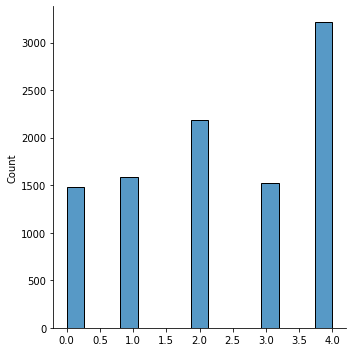

In [10]:
sns.displot(banner_selected)

In [11]:
number_of_banners = 5
number_of_runs = 10000

N = np.zeros(number_of_banners)
Q = np.zeros(number_of_banners)

sum_of_rewards = np.zeros(number_of_banners)
banner_selected = []

In [12]:
def epsionGreedy(eps, number_of_banners, Q):
    prb = np.random.random()
    if prb <= eps:
        action = np.random.choice(number_of_banners)
    else:
        action = np.argmax(Q)
    return action

In [13]:
for run in range(number_of_runs):
    """Get the action"""
    banner = epsionGreedy(0.75, number_of_banners, Q)
    """Get the reward"""
    reward = df.values[run, banner]
    
    N[banner] += 1
    Q[banner] += (reward-Q[banner])/N[banner]
    
    sum_of_rewards[banner] += reward
    banner_selected.append(banner)

In [14]:
print( sum_of_rewards ) 

[ 760.  793. 1341.  989. 1140.]


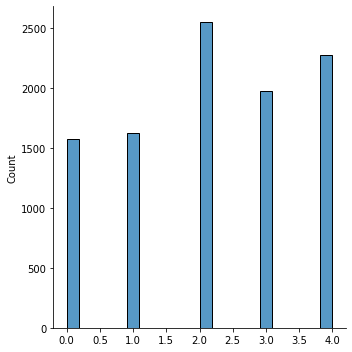

In [15]:
sns.displot(banner_selected)

In [16]:
[round(x,2) for x in Q]

[0.48, 0.49, 0.53, 0.5, 0.5]

In [17]:
print(N)

[1572. 1626. 2554. 1975. 2273.]
